In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
df = pd.read_csv("D:\emp layoff predection\Employee Layoff Prediction dataset\WA_Fn-UseC_-HR-Employee-Attrition.csv")
print("Dataset Shape:", df.shape)
print(df.head())
print(df.info())

Dataset Shape: (1470, 35)
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  

In [3]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])


X = df.drop('Attrition', axis=1)
y = df['Attrition']


scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X_reshaped, y, test_size=0.2, random_state=42
)

In [5]:
model = Sequential([
    LSTM(128, activation='tanh', input_shape=(1, X_train.shape[2]), return_sequences=True),
    Dropout(0.3),
    LSTM(64, activation='tanh'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])


model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
history = model.fit(
    X_train, y_train,
    epochs=25,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.8415 - loss: 0.5594 - val_accuracy: 0.7966 - val_loss: 0.5281
Epoch 2/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8404 - loss: 0.4293 - val_accuracy: 0.7966 - val_loss: 0.4912
Epoch 3/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8404 - loss: 0.4109 - val_accuracy: 0.7966 - val_loss: 0.4688
Epoch 4/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8404 - loss: 0.3959 - val_accuracy: 0.7966 - val_loss: 0.4609
Epoch 5/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8404 - loss: 0.3763 - val_accuracy: 0.7966 - val_loss: 0.4145
Epoch 6/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8436 - loss: 0.3568 - val_accuracy: 0.8136 - val_loss: 0.4066
Epoch 7/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8596 - loss: 0.3507 - val_accuracy: 0.8390 - val_loss: 0.4023
Epoch 8/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8617 - loss: 0.3381 - val_accuracy: 0.8390 - val_loss

In [7]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Accuracy and report
print("\n--- LSTM Model Evaluation ---")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step

--- LSTM Model Evaluation ---
Accuracy: 0.8775510204081632

Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93       255
           1       1.00      0.08      0.14        39

    accuracy                           0.88       294
   macro avg       0.94      0.54      0.54       294
weighted avg       0.89      0.88      0.83       294



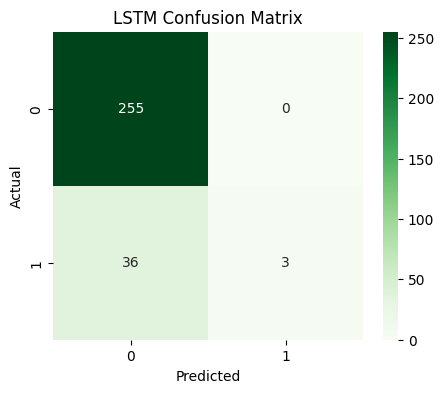

In [8]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("LSTM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


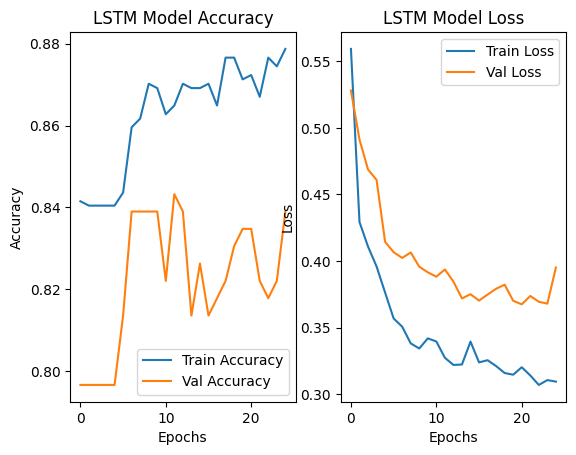

In [10]:
#Accuracy graph
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('LSTM Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss graph
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()